In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [22]:
# Contador global para numerar los trominós. 
# Explique:
tromino_id = 1

In [ ]:
def cubrir_tablero(tablero, n, fila_vacia, col_vacia, x, y):
    global tromino_id

# este es el caso base en una cuadricula de 2x2 quedando un espacio vacio:
    if n == 2:
        for i in range(2):
            for j in range(2):
                if (x + i, y + j) != (fila_vacia, col_vacia):
                    tablero[x + i][y + j] = tromino_id
        tromino_id += 1
        return

# Con m redefines el tamaño del nuevo tablero a ser analizado en la recursión:
    m = n/2 #se redefine como n/2 por que en la recursividad se divide el tablero en 4 (cada lado en 2), osea 2^(n-1) x 2^(n-1) 

    cx, cy = x + m, y + m # calcula el punto central del tablero actual
    f_mid, c_mid = cx - 1, cy - 1 # coordenadas de la esquina inferior derecha del cuadrante superior izquierdo

# Explique: busca en que cuadrante está el espacio vacio original
    if fila_vacia < cx and col_vacia < cy: # significa que el espacio vacio esta en el cuadrante superior izquierdo
        cuadrante = 'sup_izq'
    elif fila_vacia < cx and col_vacia >= cy: # significa que el espacio vacio esta en el cuadrante superior derecho
        cuadrante = 'sup_der'
    elif fila_vacia >= cx and col_vacia < cy:  # significa que el espacio vacio esta en el cuadrante inferior izquierdo
        cuadrante = 'inf_izq'
    else:
        cuadrante = 'inf_der' # significa que el espacio vacio esta en el cuadrante inferior derecho

# Explique: crea el un trominó poniendo una pieza en 3 de los 4 cuadrantes menos en el que tiene el espacio vacio original
    if cuadrante != 'sup_izq':
        tablero[f_mid][c_mid] = tromino_id #
    if cuadrante != 'sup_der':
        tablero[f_mid][cy] = tromino_id
    if cuadrante != 'inf_izq':
        tablero[cx][c_mid] = tromino_id
    if cuadrante != 'inf_der':
        tablero[cx][cy] = tromino_id

    current_id = tromino_id
    tromino_id += 1

# en esta sección de codigo esta el caso de recursividad donde se acude a la función cubrir_tablero 4 veces
# Explique: 
    cubrir_tablero(tablero, m,
                   fila_vacia if cuadrante == 'sup_izq' else f_mid,
                   col_vacia if cuadrante == 'sup_izq' else c_mid,
                   x, y)

    cubrir_tablero(tablero, m,
                   fila_vacia if cuadrante == 'sup_der' else f_mid,
                   col_vacia if cuadrante == 'sup_der' else cy,
                   x, y + m)

    cubrir_tablero(tablero, m,
                   fila_vacia if cuadrante == 'inf_izq' else cx,
                   col_vacia if cuadrante == 'inf_izq' else c_mid,
                   x + m, y)

    cubrir_tablero(tablero, m,
                   fila_vacia if cuadrante == 'inf_der' else cx,
                   col_vacia if cuadrante == 'inf_der' else cy,
                   x + m, y + m)


SyntaxError: invalid syntax (3299560315.py, line 14)

In [ ]:
def mostrar_tablero(tablero):
    cmap = plt.cm.get_cmap("gist_ncar", np.max(tablero) + 1)
    cmap.set_under('black')  # Para la casilla faltante

    plt.figure(figsize=(10, 10))
    plt.imshow(tablero, cmap=cmap, norm=mcolors.Normalize(vmin=0, vmax=np.max(tablero)))
    
    for i in range(tablero.shape[0]):
        for j in range(tablero.shape[1]):
            val = tablero[i][j]
            text = "*" if val == -1 else str(val)
            plt.text(j, i, text, ha='center', va='center', color='white', fontsize=10)
    
    plt.title("Tablero cubierto con trominós (la casilla faltante está marcada con *)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_14812\2291613202.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("gist_ncar", np.max(tablero) + 1)


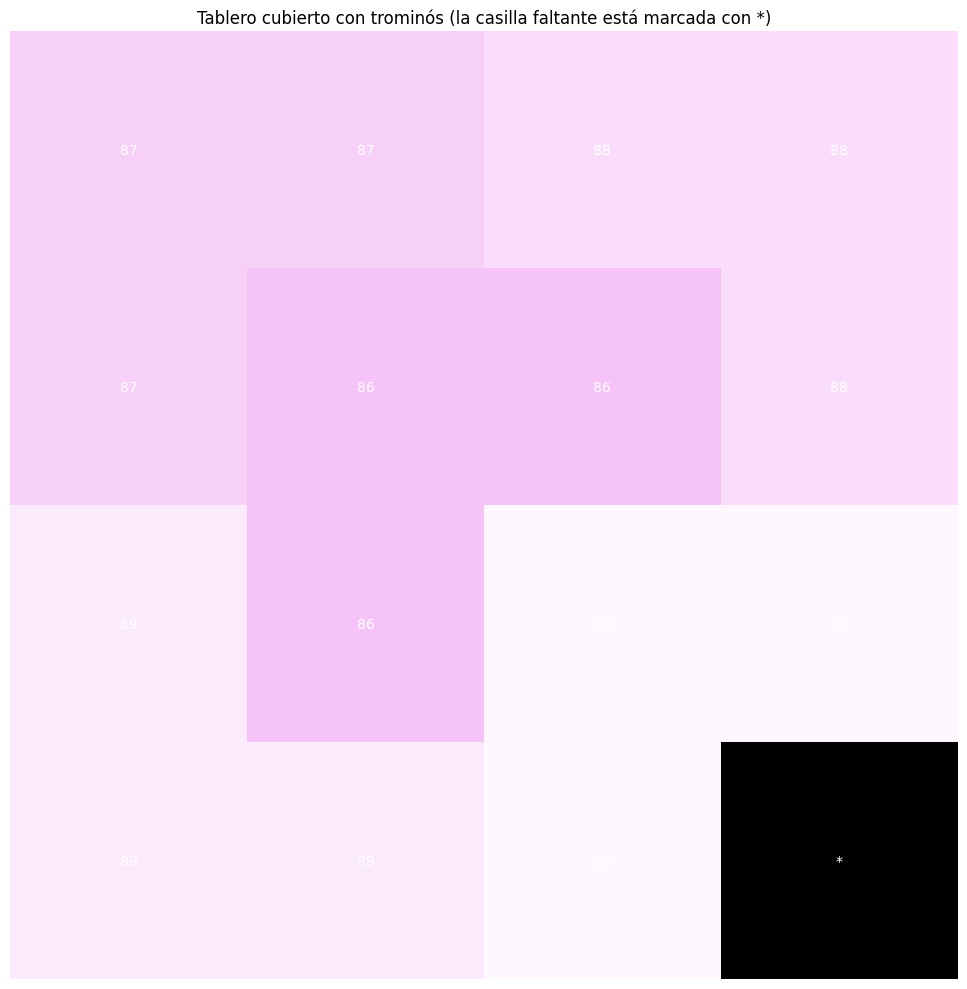

In [48]:
# ---------- Parámetros iniciales del tablero ----------
k = 2 # tamaño del tablero será 2^k x 2^k
tam = 2 ** k
tablero = np.zeros((  tam , tam ), dtype=int)

# Coordenada de Casilla faltante (cuadro deficiente)
fila_faltante = 3
col_faltante = 3
tablero[fila_faltante][col_faltante] = -1

# Ejecutar algoritmo
cubrir_tablero(tablero, tam, fila_faltante, col_faltante, 0, 0)

# Visualizar
mostrar_tablero(tablero)